In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# 밑에 실행하면서 뜨는 빨간 경고 팝업 뜨지 않게 하기 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data['species'].value_counts()

# 총 3가지 품종

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

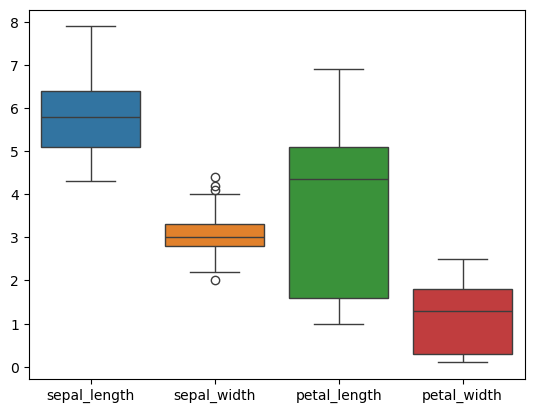

In [9]:
sns.boxplot(data)

data['species'] : 원핫인코딩 한 후 바로 데이터 분석 가능

In [7]:
X = data.drop("species", axis=1)
y = data['species']

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [11]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

### 1) Sequential 

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))   # 입력층
model.add(Dense(6, activation='relu'))                 # 은닉층 1
model.add(Dense(3, activation='softmax'))              # 출력층, 다중분류이기 때문에 소프트맥스
model.summary()

# 우리가 분류해야 하는 것이 3개 이기 때문에 'species'
# Iris-setosa        50
# Iris-versicolor    50
# Iris-virginica     50

Model: "sequential"
_________________________________________________________________


2024-09-09 16:20:27.393484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 16:20:27.394702: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-09 16:20:27.475826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:20:27.475873: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-09 16:20:27.475895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


In [15]:
X_train.shape

(105, 4)

In [16]:
data['species'].value_counts()

# 총 3가지 품종

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 500, batch_size = 50, validation_data = (X_test, y_test)) 
pred = model.predict(X_test)
pred = pd.DataFrame(pred)


Epoch 1/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2088 - accuracy: 0.9400

2024-09-09 16:33:19.589046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 16:33:19.634743: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:33:19.634810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 16:33:19.789512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 90ms/step - loss: 0.2027 - accuracy: 0.9524 - val_loss: 0.2057 - val_accuracy: 0.9556
Epoch 2/500
3/3 [==============================] - 0s 27ms/step - loss: 0.2008 - accuracy: 0.9524 - val_loss: 0.2054 - val_accuracy: 0.9556
Epoch 3/500
3/3 [==============================] - 0s 25ms/step - loss: 0.2003 - accuracy: 0.9524 - val_loss: 0.2055 - val_accuracy: 0.9556
Epoch 4/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2171 - accuracy: 0.9600

2024-09-09 16:33:19.816823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:33:19.816898: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 26ms/step - loss: 0.1999 - accuracy: 0.9524 - val_loss: 0.2058 - val_accuracy: 0.9333
Epoch 5/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1997 - accuracy: 0.9524 - val_loss: 0.2068 - val_accuracy: 0.9333
Epoch 6/500
3/3 [==============================] - 0s 26ms/step - loss: 0.2003 - accuracy: 0.9524 - val_loss: 0.2064 - val_accuracy: 0.9333
Epoch 7/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1990 - accuracy: 0.9524 - val_loss: 0.2026 - val_accuracy: 0.9556
Epoch 8/500
3/3 [==============================] - 0s 30ms/step - loss: 0.1974 - accuracy: 0.9524 - val_loss: 0.1991 - val_accuracy: 0.9556
Epoch 9/500
3/3 [==============================] - 0s 28ms/step - loss: 0.1971 - accuracy: 0.9524 - val_loss: 0.1959 - val_accuracy: 0.9778
Epoch 10/500
3/3 [==============================] - 0s 30ms/step - loss: 0.1959 - accuracy: 0.9619 - val_loss: 0.1931 - val_accuracy: 0.9778
Epoch 11/500
3/3 [=============

3/3 [==============================] - 0s 24ms/step - loss: 0.1758 - accuracy: 0.9619 - val_loss: 0.1700 - val_accuracy: 0.9778
Epoch 63/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1753 - accuracy: 0.9619 - val_loss: 0.1715 - val_accuracy: 0.9778
Epoch 64/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1754 - accuracy: 0.9619 - val_loss: 0.1730 - val_accuracy: 0.9778
Epoch 65/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1754 - accuracy: 0.9619 - val_loss: 0.1734 - val_accuracy: 0.9778
Epoch 66/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1755 - accuracy: 0.9619 - val_loss: 0.1728 - val_accuracy: 0.9778
Epoch 67/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1746 - accuracy: 0.9619 - val_loss: 0.1695 - val_accuracy: 0.9778
Epoch 68/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1741 - accuracy: 0.9619 - val_loss: 0.1674 - val_accuracy: 0.9778
Epoch 69/500
3/3 [========

3/3 [==============================] - 0s 24ms/step - loss: 0.1565 - accuracy: 0.9619 - val_loss: 0.1461 - val_accuracy: 0.9778
Epoch 121/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1562 - accuracy: 0.9619 - val_loss: 0.1453 - val_accuracy: 0.9778
Epoch 122/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1560 - accuracy: 0.9619 - val_loss: 0.1446 - val_accuracy: 0.9778
Epoch 123/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1558 - accuracy: 0.9619 - val_loss: 0.1442 - val_accuracy: 0.9778
Epoch 124/500
3/3 [==============================] - 0s 28ms/step - loss: 0.1553 - accuracy: 0.9619 - val_loss: 0.1444 - val_accuracy: 0.9778
Epoch 125/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1549 - accuracy: 0.9619 - val_loss: 0.1449 - val_accuracy: 0.9778
Epoch 126/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1550 - accuracy: 0.9619 - val_loss: 0.1461 - val_accuracy: 0.9778
Epoch 127/500
3/3 [=

Epoch 178/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1425 - accuracy: 0.9619 - val_loss: 0.1308 - val_accuracy: 0.9778
Epoch 179/500
3/3 [==============================] - 0s 34ms/step - loss: 0.1423 - accuracy: 0.9619 - val_loss: 0.1301 - val_accuracy: 0.9778
Epoch 180/500
3/3 [==============================] - 0s 29ms/step - loss: 0.1420 - accuracy: 0.9619 - val_loss: 0.1290 - val_accuracy: 0.9778
Epoch 181/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1419 - accuracy: 0.9619 - val_loss: 0.1280 - val_accuracy: 0.9778
Epoch 182/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1415 - accuracy: 0.9619 - val_loss: 0.1271 - val_accuracy: 0.9778
Epoch 183/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1414 - accuracy: 0.9524 - val_loss: 0.1260 - val_accuracy: 0.9778
Epoch 184/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1412 - accuracy: 0.9524 - val_loss: 0.1252 - val_accuracy: 0.9778
Epoch 

Epoch 236/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1307 - accuracy: 0.9524 - val_loss: 0.1147 - val_accuracy: 0.9778
Epoch 237/500
3/3 [==============================] - 0s 29ms/step - loss: 0.1309 - accuracy: 0.9524 - val_loss: 0.1157 - val_accuracy: 0.9778
Epoch 238/500
3/3 [==============================] - 0s 37ms/step - loss: 0.1304 - accuracy: 0.9619 - val_loss: 0.1163 - val_accuracy: 0.9778
Epoch 239/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1304 - accuracy: 0.9619 - val_loss: 0.1173 - val_accuracy: 0.9778
Epoch 240/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1306 - accuracy: 0.9619 - val_loss: 0.1181 - val_accuracy: 0.9778
Epoch 241/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1306 - accuracy: 0.9619 - val_loss: 0.1177 - val_accuracy: 0.9778
Epoch 242/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1304 - accuracy: 0.9619 - val_loss: 0.1167 - val_accuracy: 0.9778
Epoch 

Epoch 294/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1222 - accuracy: 0.9619 - val_loss: 0.1061 - val_accuracy: 0.9778
Epoch 295/500
3/3 [==============================] - 0s 29ms/step - loss: 0.1218 - accuracy: 0.9619 - val_loss: 0.1051 - val_accuracy: 0.9778
Epoch 296/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1213 - accuracy: 0.9619 - val_loss: 0.1033 - val_accuracy: 0.9778
Epoch 297/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1212 - accuracy: 0.9524 - val_loss: 0.1006 - val_accuracy: 0.9778
Epoch 298/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1204 - accuracy: 0.9524 - val_loss: 0.0988 - val_accuracy: 0.9778
Epoch 299/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1212 - accuracy: 0.9619 - val_loss: 0.0975 - val_accuracy: 0.9778
Epoch 300/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1210 - accuracy: 0.9619 - val_loss: 0.0969 - val_accuracy: 0.9778
Epoch 

Epoch 352/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1133 - accuracy: 0.9524 - val_loss: 0.0906 - val_accuracy: 0.9778
Epoch 353/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1131 - accuracy: 0.9524 - val_loss: 0.0909 - val_accuracy: 0.9778
Epoch 354/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1133 - accuracy: 0.9524 - val_loss: 0.0917 - val_accuracy: 0.9778
Epoch 355/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1131 - accuracy: 0.9524 - val_loss: 0.0917 - val_accuracy: 0.9778
Epoch 356/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1128 - accuracy: 0.9524 - val_loss: 0.0908 - val_accuracy: 0.9778
Epoch 357/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1127 - accuracy: 0.9524 - val_loss: 0.0901 - val_accuracy: 0.9778
Epoch 358/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1126 - accuracy: 0.9524 - val_loss: 0.0891 - val_accuracy: 0.9778
Epoch 

Epoch 410/500
3/3 [==============================] - 0s 31ms/step - loss: 0.1092 - accuracy: 0.9619 - val_loss: 0.0803 - val_accuracy: 0.9778
Epoch 411/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1087 - accuracy: 0.9619 - val_loss: 0.0811 - val_accuracy: 0.9778
Epoch 412/500
3/3 [==============================] - 0s 29ms/step - loss: 0.1070 - accuracy: 0.9619 - val_loss: 0.0821 - val_accuracy: 0.9778
Epoch 413/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1067 - accuracy: 0.9524 - val_loss: 0.0833 - val_accuracy: 0.9778
Epoch 414/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1071 - accuracy: 0.9524 - val_loss: 0.0849 - val_accuracy: 0.9778
Epoch 415/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1073 - accuracy: 0.9524 - val_loss: 0.0864 - val_accuracy: 0.9778
Epoch 416/500
3/3 [==============================] - 0s 28ms/step - loss: 0.1075 - accuracy: 0.9524 - val_loss: 0.0875 - val_accuracy: 0.9778
Epoch 

Epoch 468/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1023 - accuracy: 0.9524 - val_loss: 0.0770 - val_accuracy: 0.9778
Epoch 469/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1021 - accuracy: 0.9524 - val_loss: 0.0774 - val_accuracy: 0.9778
Epoch 470/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1022 - accuracy: 0.9524 - val_loss: 0.0772 - val_accuracy: 0.9778
Epoch 471/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1019 - accuracy: 0.9524 - val_loss: 0.0757 - val_accuracy: 0.9778
Epoch 472/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1018 - accuracy: 0.9524 - val_loss: 0.0743 - val_accuracy: 0.9778
Epoch 473/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1019 - accuracy: 0.9619 - val_loss: 0.0738 - val_accuracy: 0.9778
Epoch 474/500
3/3 [==============================] - 0s 26ms/step - loss: 0.1022 - accuracy: 0.9619 - val_loss: 0.0734 - val_accuracy: 0.9778
Epoch 

2024-09-09 16:33:53.764696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


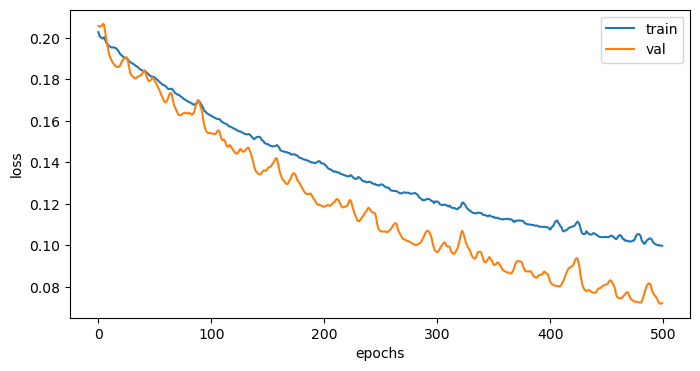

In [24]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [32]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
y_labeled = le.fit_transform(y)

ValueError: y should be a 1d array, got an array of shape (150, 3) instead.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_labeled, test_size=0.3, random_state=10)

### 2) 함수형 

In [35]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model 

In [54]:
X_train.shape

# 이미 독립변수의 수 = 4 를 알고 있기 때문에 

(105, 4)

In [53]:
X_train.shape[1]

4

In [58]:
inputs = Input(shape=(X_train.shape[1], ))      # 입력층 정의 Input(shape=(독립변수 수, )), 그리고 이미 독립변수의 수가 4임을 알고 있다. 
x = Dense(16, activation='relu')(inputs)        # 은닉층 1번 
x = Dense(8, activation='relu')(x)              # 은닉층 2번
x = Dense(3, activation='softmax')(x)           # 출력층 

model = Model(inputs, x)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 3)                 27        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)


Epoch 1/400
1/2 [==============>...............] - ETA: 0s - loss: 1.1025 - accuracy: 0.0700

2024-09-09 17:18:15.375553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:18:15.416916: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:18:15.416969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 17:18:15.548335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:18:15.574073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to

2/2 [==============================] - 0s 154ms/step - loss: 1.1033 - accuracy: 0.0667 - val_loss: 1.1021 - val_accuracy: 0.1333
Epoch 2/400
2/2 [==============================] - 0s 42ms/step - loss: 1.1011 - accuracy: 0.0667 - val_loss: 1.1004 - val_accuracy: 0.1333
Epoch 3/400
2/2 [==============================] - 0s 39ms/step - loss: 1.0991 - accuracy: 0.1333 - val_loss: 1.0988 - val_accuracy: 0.1556
Epoch 4/400
2/2 [==============================] - 0s 39ms/step - loss: 1.0973 - accuracy: 0.1238 - val_loss: 1.0970 - val_accuracy: 0.2000
Epoch 5/400
2/2 [==============================] - 0s 36ms/step - loss: 1.0956 - accuracy: 0.1810 - val_loss: 1.0955 - val_accuracy: 0.2889
Epoch 6/400
2/2 [==============================] - 0s 42ms/step - loss: 1.0940 - accuracy: 0.2381 - val_loss: 1.0939 - val_accuracy: 0.3556
Epoch 7/400
2/2 [==============================] - 0s 42ms/step - loss: 1.0925 - accuracy: 0.2857 - val_loss: 1.0923 - val_accuracy: 0.4000
Epoch 8/400
2/2 [==============

2/2 [==============================] - 0s 38ms/step - loss: 0.9869 - accuracy: 0.6857 - val_loss: 1.0104 - val_accuracy: 0.6222
Epoch 60/400
2/2 [==============================] - 0s 43ms/step - loss: 0.9838 - accuracy: 0.6857 - val_loss: 1.0079 - val_accuracy: 0.6222
Epoch 61/400
2/2 [==============================] - 0s 40ms/step - loss: 0.9805 - accuracy: 0.6857 - val_loss: 1.0054 - val_accuracy: 0.6222
Epoch 62/400
2/2 [==============================] - 0s 43ms/step - loss: 0.9772 - accuracy: 0.6857 - val_loss: 1.0028 - val_accuracy: 0.6222
Epoch 63/400
2/2 [==============================] - 0s 39ms/step - loss: 0.9739 - accuracy: 0.6857 - val_loss: 1.0002 - val_accuracy: 0.6222
Epoch 64/400
2/2 [==============================] - 0s 39ms/step - loss: 0.9704 - accuracy: 0.6857 - val_loss: 0.9975 - val_accuracy: 0.6222
Epoch 65/400
2/2 [==============================] - 0s 54ms/step - loss: 0.9670 - accuracy: 0.6857 - val_loss: 0.9949 - val_accuracy: 0.6222
Epoch 66/400
2/2 [========

2/2 [==============================] - 0s 38ms/step - loss: 0.7703 - accuracy: 0.6857 - val_loss: 0.8234 - val_accuracy: 0.6222
Epoch 118/400
2/2 [==============================] - 0s 41ms/step - loss: 0.7664 - accuracy: 0.6857 - val_loss: 0.8205 - val_accuracy: 0.6222
Epoch 119/400
2/2 [==============================] - 0s 52ms/step - loss: 0.7625 - accuracy: 0.6857 - val_loss: 0.8177 - val_accuracy: 0.6222
Epoch 120/400
2/2 [==============================] - 0s 39ms/step - loss: 0.7589 - accuracy: 0.6857 - val_loss: 0.8148 - val_accuracy: 0.6222
Epoch 121/400
2/2 [==============================] - 0s 45ms/step - loss: 0.7553 - accuracy: 0.6857 - val_loss: 0.8117 - val_accuracy: 0.6222
Epoch 122/400
2/2 [==============================] - 0s 41ms/step - loss: 0.7517 - accuracy: 0.6857 - val_loss: 0.8085 - val_accuracy: 0.6222
Epoch 123/400
2/2 [==============================] - 0s 39ms/step - loss: 0.7482 - accuracy: 0.6857 - val_loss: 0.8053 - val_accuracy: 0.6222
Epoch 124/400
2/2 [=

Epoch 175/400
2/2 [==============================] - 0s 40ms/step - loss: 0.6004 - accuracy: 0.6857 - val_loss: 0.6653 - val_accuracy: 0.6222
Epoch 176/400
2/2 [==============================] - 0s 38ms/step - loss: 0.5983 - accuracy: 0.6857 - val_loss: 0.6632 - val_accuracy: 0.6222
Epoch 177/400
2/2 [==============================] - 0s 36ms/step - loss: 0.5962 - accuracy: 0.6857 - val_loss: 0.6609 - val_accuracy: 0.6222
Epoch 178/400
2/2 [==============================] - 0s 39ms/step - loss: 0.5941 - accuracy: 0.6857 - val_loss: 0.6587 - val_accuracy: 0.6222
Epoch 179/400
2/2 [==============================] - 0s 39ms/step - loss: 0.5920 - accuracy: 0.6857 - val_loss: 0.6565 - val_accuracy: 0.6222
Epoch 180/400
2/2 [==============================] - 0s 37ms/step - loss: 0.5900 - accuracy: 0.6857 - val_loss: 0.6544 - val_accuracy: 0.6222
Epoch 181/400
2/2 [==============================] - 0s 40ms/step - loss: 0.5879 - accuracy: 0.6857 - val_loss: 0.6525 - val_accuracy: 0.6222
Epoch 

Epoch 233/400
2/2 [==============================] - 0s 36ms/step - loss: 0.5083 - accuracy: 0.6857 - val_loss: 0.5710 - val_accuracy: 0.6222
Epoch 234/400
2/2 [==============================] - 0s 51ms/step - loss: 0.5071 - accuracy: 0.6857 - val_loss: 0.5697 - val_accuracy: 0.6222
Epoch 235/400
2/2 [==============================] - 0s 38ms/step - loss: 0.5060 - accuracy: 0.6857 - val_loss: 0.5683 - val_accuracy: 0.6222
Epoch 236/400
2/2 [==============================] - 0s 39ms/step - loss: 0.5048 - accuracy: 0.6857 - val_loss: 0.5671 - val_accuracy: 0.6222
Epoch 237/400
2/2 [==============================] - 0s 42ms/step - loss: 0.5036 - accuracy: 0.6857 - val_loss: 0.5659 - val_accuracy: 0.6222
Epoch 238/400
2/2 [==============================] - 0s 39ms/step - loss: 0.5025 - accuracy: 0.6857 - val_loss: 0.5646 - val_accuracy: 0.6222
Epoch 239/400
2/2 [==============================] - 0s 39ms/step - loss: 0.5013 - accuracy: 0.6857 - val_loss: 0.5630 - val_accuracy: 0.6222
Epoch 

Epoch 291/400
2/2 [==============================] - 0s 38ms/step - loss: 0.4510 - accuracy: 0.7333 - val_loss: 0.5035 - val_accuracy: 0.6667
Epoch 292/400
2/2 [==============================] - 0s 39ms/step - loss: 0.4504 - accuracy: 0.7333 - val_loss: 0.5020 - val_accuracy: 0.6667
Epoch 293/400
2/2 [==============================] - 0s 38ms/step - loss: 0.4496 - accuracy: 0.7333 - val_loss: 0.5009 - val_accuracy: 0.6667
Epoch 294/400
2/2 [==============================] - 0s 40ms/step - loss: 0.4489 - accuracy: 0.7333 - val_loss: 0.5000 - val_accuracy: 0.6667
Epoch 295/400
2/2 [==============================] - 0s 40ms/step - loss: 0.4481 - accuracy: 0.7429 - val_loss: 0.4992 - val_accuracy: 0.6667
Epoch 296/400
2/2 [==============================] - 0s 41ms/step - loss: 0.4472 - accuracy: 0.7429 - val_loss: 0.4987 - val_accuracy: 0.6667
Epoch 297/400
2/2 [==============================] - 0s 56ms/step - loss: 0.4463 - accuracy: 0.7333 - val_loss: 0.4985 - val_accuracy: 0.6667
Epoch 

Epoch 349/400
2/2 [==============================] - 0s 42ms/step - loss: 0.4069 - accuracy: 0.8190 - val_loss: 0.4528 - val_accuracy: 0.7556
Epoch 350/400
2/2 [==============================] - 0s 41ms/step - loss: 0.4064 - accuracy: 0.8000 - val_loss: 0.4528 - val_accuracy: 0.7333
Epoch 351/400
2/2 [==============================] - 0s 36ms/step - loss: 0.4056 - accuracy: 0.8000 - val_loss: 0.4520 - val_accuracy: 0.7556
Epoch 352/400
2/2 [==============================] - 0s 43ms/step - loss: 0.4049 - accuracy: 0.8000 - val_loss: 0.4508 - val_accuracy: 0.7556
Epoch 353/400
2/2 [==============================] - 0s 43ms/step - loss: 0.4042 - accuracy: 0.8000 - val_loss: 0.4495 - val_accuracy: 0.7556
Epoch 354/400
2/2 [==============================] - 0s 41ms/step - loss: 0.4037 - accuracy: 0.8190 - val_loss: 0.4484 - val_accuracy: 0.7556
Epoch 355/400
2/2 [==============================] - 0s 44ms/step - loss: 0.4029 - accuracy: 0.8190 - val_loss: 0.4475 - val_accuracy: 0.7556
Epoch 

2024-09-09 17:18:38.740837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


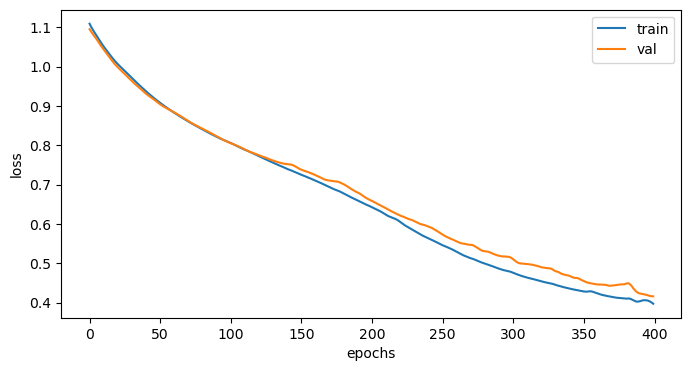

In [55]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 3) 클래스형

In [59]:
import tensorflow as tf

In [60]:
class Iris(tf.keras.Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation='relu')
        self.dense2 = tf.keras.layers.Dense(8, activation='relu')
        self.classifier = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.classifier(x)

In [61]:
model = Iris()

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=500, validation_data=(X_test, y_test))
pred = model.predict(X_test) 
pred = pd.DataFrame(pred)

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 1.0953 - accuracy: 0.3143

2024-09-09 17:26:08.579588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:26:08.622031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:26:08.622103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 17:26:08.772205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 477ms/step - loss: 1.0953 - accuracy: 0.3143 - val_loss: 1.0800 - val_accuracy: 0.3778
Epoch 2/200
1/1 [==============================] - 0s 45ms/step - loss: 1.0929 - accuracy: 0.3143 - val_loss: 1.0782 - val_accuracy: 0.3556
Epoch 3/200
1/1 [==============================] - 0s 56ms/step - loss: 1.0907 - accuracy: 0.3048 - val_loss: 1.0765 - val_accuracy: 0.3778
Epoch 4/200
1/1 [==============================] - 0s 51ms/step - loss: 1.0884 - accuracy: 0.3238 - val_loss: 1.0748 - val_accuracy: 0.3778
Epoch 5/200
1/1 [==============================] - ETA: 0s - loss: 1.0863 - accuracy: 0.3238

2024-09-09 17:26:08.796874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:26:08.796963: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 54ms/step - loss: 1.0863 - accuracy: 0.3238 - val_loss: 1.0730 - val_accuracy: 0.3778
Epoch 6/200
1/1 [==============================] - 0s 48ms/step - loss: 1.0842 - accuracy: 0.3429 - val_loss: 1.0713 - val_accuracy: 0.4000
Epoch 7/200
1/1 [==============================] - 0s 51ms/step - loss: 1.0822 - accuracy: 0.3905 - val_loss: 1.0696 - val_accuracy: 0.3778
Epoch 8/200
1/1 [==============================] - 0s 48ms/step - loss: 1.0801 - accuracy: 0.4095 - val_loss: 1.0679 - val_accuracy: 0.4000
Epoch 9/200
1/1 [==============================] - 0s 46ms/step - loss: 1.0781 - accuracy: 0.4095 - val_loss: 1.0662 - val_accuracy: 0.4000
Epoch 10/200
1/1 [==============================] - 0s 46ms/step - loss: 1.0761 - accuracy: 0.4190 - val_loss: 1.0645 - val_accuracy: 0.4444
Epoch 11/200
1/1 [==============================] - 0s 47ms/step - loss: 1.0741 - accuracy: 0.4095 - val_loss: 1.0628 - val_accuracy: 0.4667
Epoch 12/200
1/1 [============

1/1 [==============================] - 0s 64ms/step - loss: 0.9662 - accuracy: 0.6000 - val_loss: 0.9615 - val_accuracy: 0.7111
Epoch 64/200
1/1 [==============================] - 0s 41ms/step - loss: 0.9639 - accuracy: 0.6095 - val_loss: 0.9594 - val_accuracy: 0.6889
Epoch 65/200
1/1 [==============================] - 0s 47ms/step - loss: 0.9617 - accuracy: 0.6190 - val_loss: 0.9573 - val_accuracy: 0.6889
Epoch 66/200
1/1 [==============================] - 0s 44ms/step - loss: 0.9594 - accuracy: 0.6095 - val_loss: 0.9551 - val_accuracy: 0.6889
Epoch 67/200
1/1 [==============================] - 0s 47ms/step - loss: 0.9571 - accuracy: 0.6095 - val_loss: 0.9530 - val_accuracy: 0.6667
Epoch 68/200
1/1 [==============================] - 0s 45ms/step - loss: 0.9548 - accuracy: 0.6190 - val_loss: 0.9508 - val_accuracy: 0.6667
Epoch 69/200
1/1 [==============================] - 0s 43ms/step - loss: 0.9525 - accuracy: 0.6190 - val_loss: 0.9486 - val_accuracy: 0.6667
Epoch 70/200
1/1 [========

1/1 [==============================] - 0s 43ms/step - loss: 0.8120 - accuracy: 0.7048 - val_loss: 0.8168 - val_accuracy: 0.6444
Epoch 122/200
1/1 [==============================] - 0s 42ms/step - loss: 0.8090 - accuracy: 0.7048 - val_loss: 0.8140 - val_accuracy: 0.6444
Epoch 123/200
1/1 [==============================] - 0s 44ms/step - loss: 0.8060 - accuracy: 0.7048 - val_loss: 0.8112 - val_accuracy: 0.6444
Epoch 124/200
1/1 [==============================] - 0s 46ms/step - loss: 0.8030 - accuracy: 0.7048 - val_loss: 0.8084 - val_accuracy: 0.6444
Epoch 125/200
1/1 [==============================] - 0s 47ms/step - loss: 0.8000 - accuracy: 0.7048 - val_loss: 0.8056 - val_accuracy: 0.6444
Epoch 126/200
1/1 [==============================] - 0s 45ms/step - loss: 0.7970 - accuracy: 0.7048 - val_loss: 0.8029 - val_accuracy: 0.6444
Epoch 127/200
1/1 [==============================] - 0s 46ms/step - loss: 0.7939 - accuracy: 0.7048 - val_loss: 0.8001 - val_accuracy: 0.6444
Epoch 128/200
1/1 [=

Epoch 179/200
1/1 [==============================] - 0s 45ms/step - loss: 0.6449 - accuracy: 0.7619 - val_loss: 0.6640 - val_accuracy: 0.6889
Epoch 180/200
1/1 [==============================] - 0s 42ms/step - loss: 0.6424 - accuracy: 0.7619 - val_loss: 0.6616 - val_accuracy: 0.6889
Epoch 181/200
1/1 [==============================] - 0s 48ms/step - loss: 0.6398 - accuracy: 0.7619 - val_loss: 0.6593 - val_accuracy: 0.6889
Epoch 182/200
1/1 [==============================] - 0s 47ms/step - loss: 0.6373 - accuracy: 0.7619 - val_loss: 0.6569 - val_accuracy: 0.6889
Epoch 183/200
1/1 [==============================] - 0s 44ms/step - loss: 0.6347 - accuracy: 0.7619 - val_loss: 0.6545 - val_accuracy: 0.6889
Epoch 184/200
1/1 [==============================] - 0s 45ms/step - loss: 0.6322 - accuracy: 0.7619 - val_loss: 0.6522 - val_accuracy: 0.6889
Epoch 185/200
1/1 [==============================] - 0s 53ms/step - loss: 0.6297 - accuracy: 0.7619 - val_loss: 0.6498 - val_accuracy: 0.6889
Epoch 

2024-09-09 17:26:18.899594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


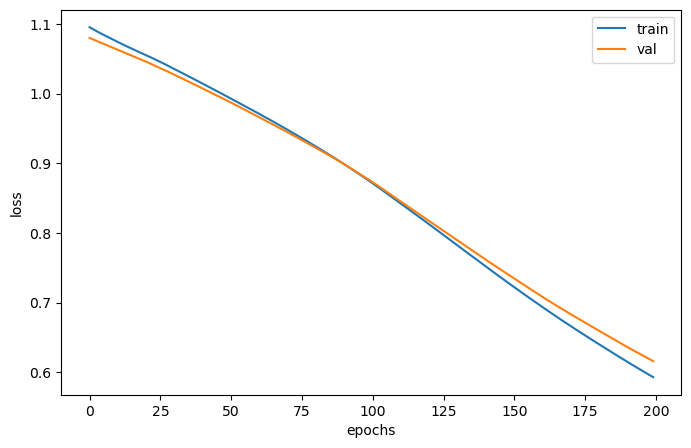

In [63]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()